In [ ]:
# Import packages

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (2).csv


In [ ]:
# Upload dataset

import io
df = pd.read_csv(io.BytesIO(uploaded['healthcare-dataset-stroke-data.csv']))

In [ ]:
# First five records of dataset

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


The first five records help us understand and confirm the nature of the data set. This will be later confirmed when we verify the data types. 

In [ ]:
# Total rows and columns of dataset

df.shape

(5110, 12)

In [ ]:
# Column labels

df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
# Initial verification of dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


This helps us verify the type of data. We understand that we have numerical values and text objects. Note that BMI is showing missing 201 values.

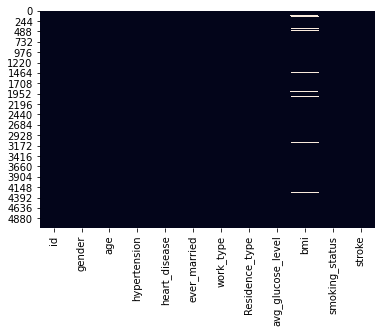

In [ ]:
# Accessing missing values through heatmap analysis

sns.heatmap(df.isnull(), cbar=False)

*Through* the use of the heatmap we confirm that BMI is the variable that is missing values. These will be fixed by replacing empty cells with the mean of the variable set. 

In [ ]:
# Mean imputation for missing values

df = df.fillna(df.mean())

In [ ]:
# Verification of no missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


After assingining the missing values with the mean, this line of code help us confirm that bmi is not missing the values anymore. 

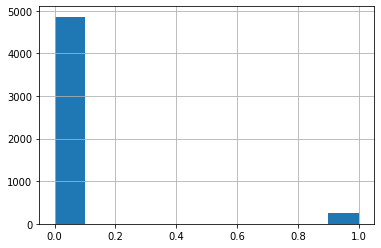

In [ ]:
# Distribution of target variable

df.stroke.hist()

The target of this assignment is stroke. 1 represents individuals reporting stroke, 0 represents individuals who do not report stroke. 

In [ ]:
# Proportion of patients that have had a stroke

df.stroke.mean()

0.0487279843444227

In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: age, Length: 104, dtype: int64

In [ ]:
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [ ]:
df['bmi'].value_counts()

28.893237    201
28.700000     41
28.400000     38
27.600000     37
27.700000     37
            ... 
60.200000      1
63.300000      1
54.300000      1
46.600000      1
48.400000      1
Name: bmi, Length: 419, dtype: int64

In [ ]:
df['avg_glucose_level'].value_counts()

93.88     6
83.16     5
91.85     5
91.68     5
73.00     5
         ..
162.14    1
111.77    1
90.91     1
103.50    1
88.02     1
Name: avg_glucose_level, Length: 3979, dtype: int64

The count of individuals reporting a stroke is of 249. That is 5.12% of the total sample. 

In [ ]:
# DATA PREPROCESSING

# Dropping variables with high cardinality

df = df.drop('id', axis=1)

High-cardinality refers to columns with values that are very uncommon or unique. High-cardinality column values are typically identification numbers, email addresses, or user names. 

In [ ]:
# Dummy coding variables ever_married and gender through lambda function
# if married = 1 otherwise 0, if male = 1 otherwise 0

df['ever_married'] = df['ever_married'].apply(lambda x:1 if x == 'Yes' else 0)
df['gender'] = df['gender'].apply(lambda x:1 if x == 'Male' else 0)

In [ ]:
# Reassigning variables into categorical features

df['work_type'] = df['work_type'].astype('category', copy=False)
df['Residence_type'] = df['Residence_type'].astype('category', copy=False)
df['smoking_status'] = df['smoking_status'].astype('category', copy=False)

All the variables that were object types or that had text values are transformed into numerical values that can be used for the analysis. These include turning values into logistical formats and assigning categorical values. 


In [ ]:
# Dummy coding categorical variables through get dummies function

df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   ever_married                    5110 non-null   int64  
 5   avg_glucose_level               5110 non-null   float64
 6   bmi                             5110 non-null   float64
 7   stroke                          5110 non-null   int64  
 8   work_type_Never_worked          5110 non-null   uint8  
 9   work_type_Private               5110 non-null   uint8  
 10  work_type_Self-employed         5110 non-null   uint8  
 11  work_type_children              5110 non-null   uint8  
 12  Residence_type_Urban            51

In [ ]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.413894,43.226614,0.097456,0.054012,0.656164,106.147677,28.893237,0.048728,0.004305,0.572407,0.160274,0.134442,0.508023,0.173190,0.370254,0.154403
std,0.492578,22.612647,0.296607,0.226063,0.475034,45.283560,7.698018,0.215320,0.065480,0.494778,0.366896,0.341160,0.499985,0.378448,0.482920,0.361370
min,0.000000,0.080000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,91.885000,28.400000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,114.090000,32.800000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Confirming that all the values are numerical.

In [ ]:
df.shape

(5110, 16)

In [ ]:
# Create dataframe from X & y for exploratory analysis

X = df.drop('stroke', axis=1)
y = df['stroke']

df_clean = pd.concat([X, y], axis=1)

In [ ]:
df_clean.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes', 'stroke'],
      dtype='object')

In [ ]:
X.describe()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.413894,43.226614,0.097456,0.054012,0.656164,106.147677,28.893237,0.004305,0.572407,0.160274,0.134442,0.508023,0.173190,0.370254,0.154403
std,0.492578,22.612647,0.296607,0.226063,0.475034,45.283560,7.698018,0.065480,0.494778,0.366896,0.341160,0.499985,0.378448,0.482920,0.361370
min,0.000000,0.080000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,91.885000,28.400000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,114.090000,32.800000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Since stroke is the target variable, it needed to be dropped and assinged into the X-axis. The x.describe() code confirms that this was succefuly done. 

In [ ]:
y.mean()

0.0487279843444227

In [ ]:
# Variable correlation analysis relative target variable

df_clean.corr()['stroke'].sort_values(ascending=False)

stroke                            1.000000
age                               0.245257
heart_disease                     0.134914
avg_glucose_level                 0.131945
hypertension                      0.127904
ever_married                      0.108340
smoking_status_formerly smoked    0.064556
work_type_Self-employed           0.062168
bmi                               0.038947
Residence_type_Urban              0.015458
work_type_Private                 0.011888
gender                            0.009117
smoking_status_smokes             0.008939
smoking_status_never smoked      -0.004129
work_type_Never_worked           -0.014882
work_type_children               -0.083869
Name: stroke, dtype: float64

The correlation analysis has reported that age, heart_disease,avg_glucose_level,hypertension, and ever_married are the variables that have higher correlations to stroke.

Note that smoking_status_never_smoked, work_type_never_worked, work_type_choldren are variables that have negative correlations to stroke. 

This is also represented in the upcoming pairplot diagramms. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


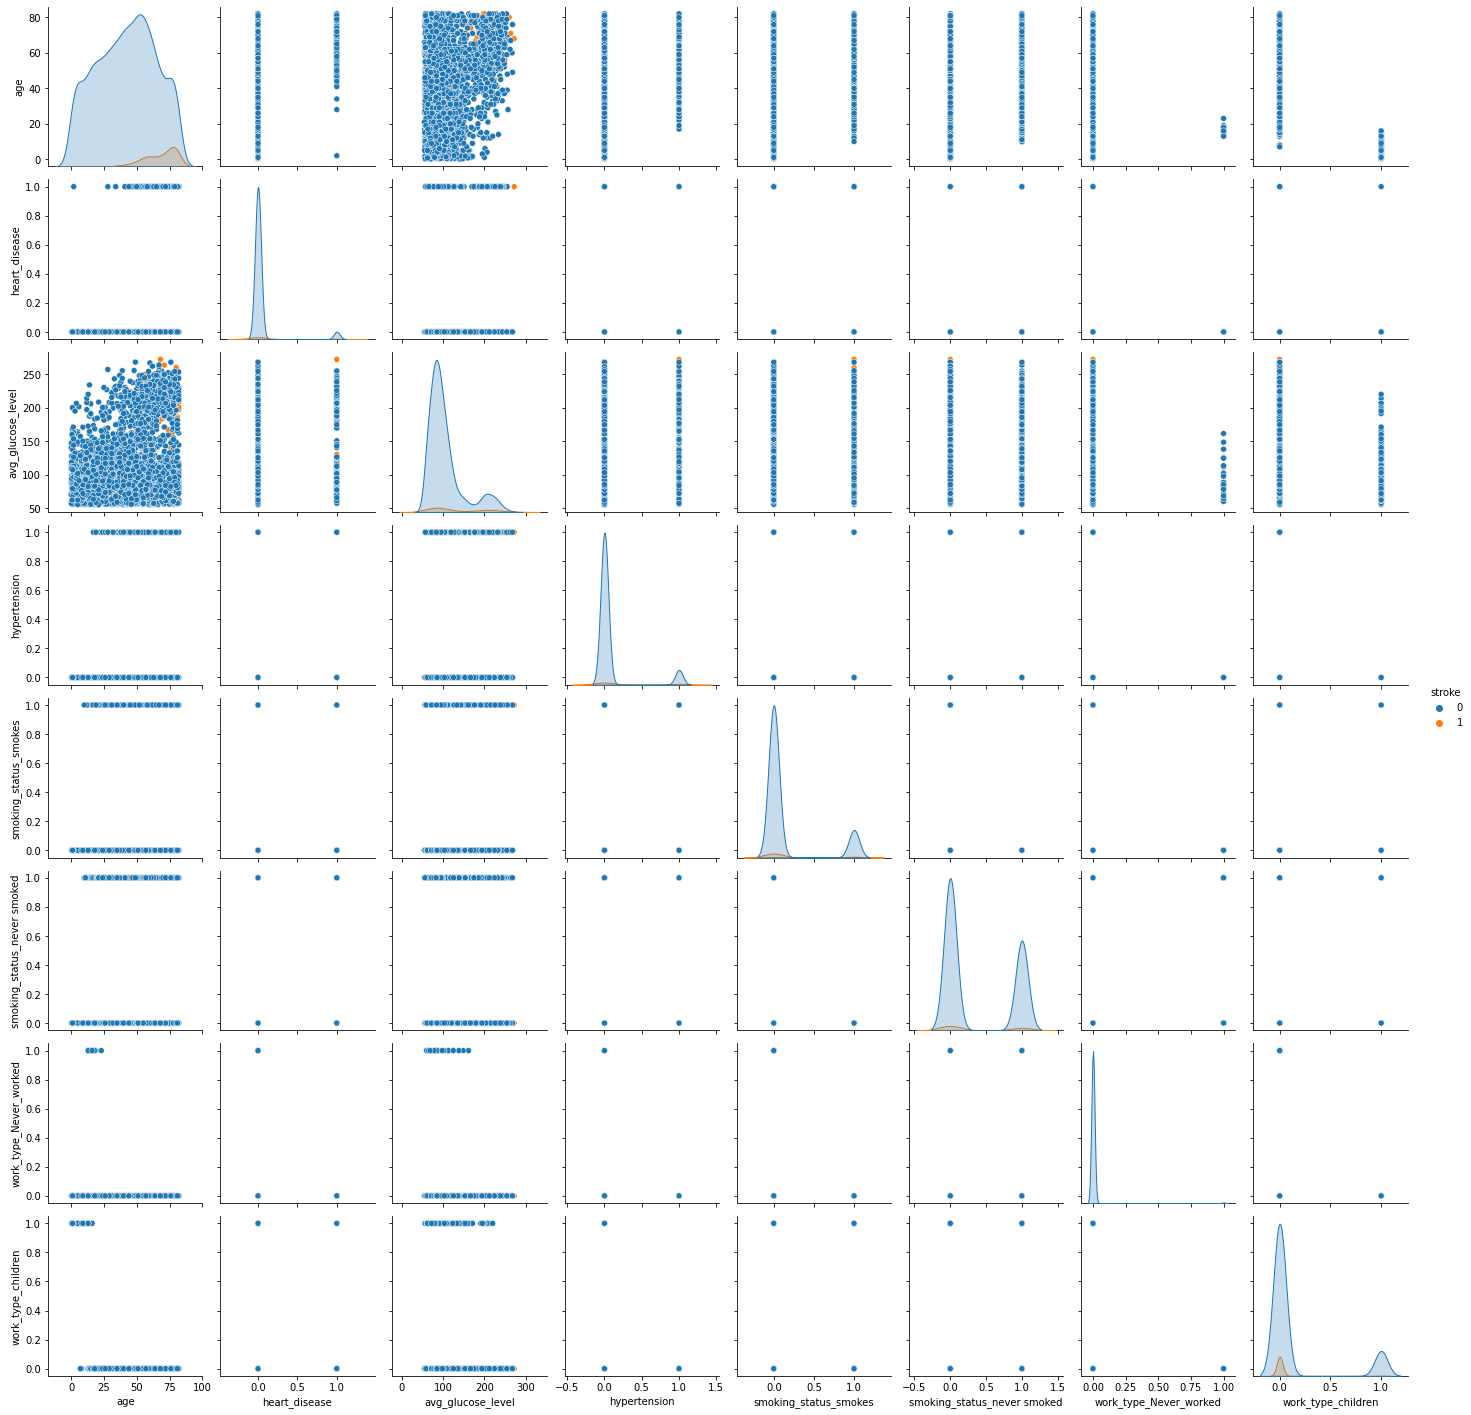

In [ ]:
# Pairplot analysis on select features (top 4, bottom 4 from .corr list)

sns.pairplot(df_clean[['age', 'heart_disease', 'avg_glucose_level', 'hypertension',
                       'smoking_status_smokes', 'smoking_status_never smoked', 'work_type_Never_worked',
                       'work_type_children', 'stroke']], hue='stroke')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of Patients')

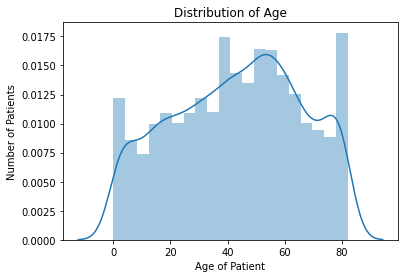

In [ ]:
sns.distplot(df_clean['age'])
plt.title('Distribution of Age')
plt.xlabel('Age of Patient')
plt.ylabel('Number of Patients')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of Patients')

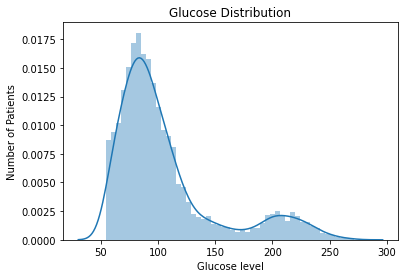

In [ ]:
sns.distplot(df_clean['avg_glucose_level'])
plt.title('Glucose Distribution')
plt.xlabel('Glucose level')
plt.ylabel('Number of Patients')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of Patients')

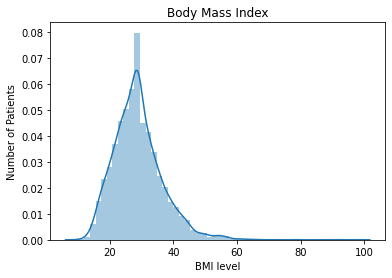

In [ ]:
sns.distplot(df_clean['bmi'])
plt.title('Body Mass Index')
plt.xlabel('BMI level')
plt.ylabel('Number of Patients')

In [ ]:
# Splitting dataset (70/30 split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

The code above is splitting the data set into 2 segments. 

Separating data into training and testing sets is an important part of evaluating data mining models. When you separate a data set into a training set and testing set, most of the data is used for training, and a smaller portion of the data is used for testing. 

As a note, using random samples of the data helps confirm that the testing and training sets are similar. Remember, by using similar data for training and testing, we reduce the effects of data discrepancies and better understand the characteristics of the model.

In [ ]:
# Oversampling using SMOTE technique for unbiased model results

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [ ]:
# Before/After Verification of target variable

from collections import Counter

print('Before SMOTE: ', Counter(y_train))
print('After SMOTE: ', Counter(y_train_sm))

Before SMOTE:  Counter({0: 3411, 1: 166})
After SMOTE:  Counter({0: 3411, 1: 3411})


In [ ]:
# Random Forest Model

rf_model = RandomForestClassifier(max_depth=5, random_state=1)
rf_model.fit(X_train_sm, y_train_sm)

y_pred_rf = rf_model.predict(X_test)

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees. A random forest alings a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1450
           1       0.17      0.31      0.22        83

    accuracy                           0.88      1533
   macro avg       0.56      0.61      0.58      1533
weighted avg       0.92      0.88      0.90      1533



Random Forest ROC AUC:
0.6128334025758204


[[1323  127]
 [  57   26]]




Text(0.5, 1.0, 'Random Forest Confusion Matrix')

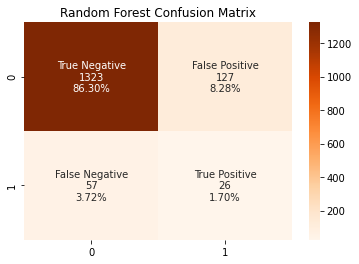

In [ ]:
# RF Model results

print('Random Forest Classification Report')
print(classification_report(y_test,y_pred_rf))
print('\n')
print('Random Forest ROC AUC:')
print(roc_auc_score(y_test,y_pred_rf))
print('\n')

rf_cf_matrix = confusion_matrix(y_test, y_pred_rf)
print(rf_cf_matrix)
print('\n')

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                rf_cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     rf_cf_matrix.flatten()/np.sum(rf_cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(rf_cf_matrix, annot=labels, fmt="", cmap='Oranges')

plt.title("Random Forest Confusion Matrix")

Although not perfect (or close to 1), the area under the curve for this random forest is significant enought to continue the modeling and correlations of the stroke indicators. 

In [ ]:
# Boosted Tree Model

bt_model = AdaBoostClassifier(n_estimators=100, random_state=1)
bt_model.fit(X_train_sm, y_train_sm)

y_pred_bt = bt_model.predict(X_test)

Boosted Tree Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1450
           1       0.33      0.07      0.12        83

    accuracy                           0.94      1533
   macro avg       0.64      0.53      0.54      1533
weighted avg       0.92      0.94      0.92      1533



Boosted Tree ROC AUC:
0.5320066472787703


[[1438   12]
 [  77    6]]




Text(0.5, 1.0, 'Boosted Tree Confusion Matrix')

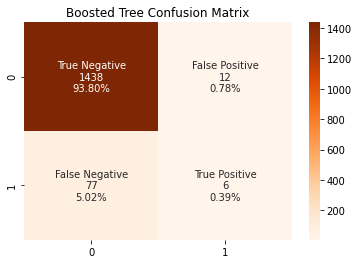

In [ ]:
# BT Model results

print('Boosted Tree Classification Report')
print(classification_report(y_test,y_pred_bt))
print('\n')
print('Boosted Tree ROC AUC:')
print(roc_auc_score(y_test, y_pred_bt))
print('\n')

bt_cf_matrix = confusion_matrix(y_test, y_pred_bt)
print(bt_cf_matrix)
print('\n')

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                bt_cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     bt_cf_matrix.flatten()/np.sum(bt_cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(bt_cf_matrix, annot=labels, fmt="", cmap='Oranges')

plt.title("Boosted Tree Confusion Matrix")

Boosting in decision tree modeling refeers to the set up where  each tree is dependent on prior trees. This leads the algorithm to learn by fitting the residual of the trees that preceded it. Ultimatelly this leads to higher accuracy. This stays true with our model. Note that after being boosted, the AUC still significant. 

In [ ]:
# Scaling data for KNN and Logistic Models

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

X_rescaled = pd.DataFrame(X_, columns=X.columns)

The K-Nearest Neighbors Classification or KNN is a tool that allows us to group variables and data point together. This model helps us get a better understanding on the relationship between each variable. The code above is preping data samples for us to analyze this model and see its potency.



In [ ]:
# Verification of rescaled data

X_rescaled.describe()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.413894,0.526692,0.097456,0.054012,0.656164,0.235563,0.212981,0.004305,0.572407,0.160274,0.134442,0.508023,0.173190,0.370254,0.154403
std,0.492578,0.276033,0.296607,0.226063,0.475034,0.209046,0.088179,0.065480,0.494778,0.366896,0.341160,0.499985,0.378448,0.482920,0.361370
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.304199,0.000000,0.000000,0.000000,0.102137,0.154639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.548340,0.000000,0.000000,1.000000,0.169721,0.207331,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.743652,0.000000,0.000000,1.000000,0.272228,0.257732,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y.mean()

0.0487279843444227

In [ ]:
# Splitting scaled dataset (70/30)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)

In [ ]:
# SMOTE scaled dataset

X_train_scaled_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Logistics Regression Model

lr_model = LogisticRegression(solver='liblinear', random_state=1)
lr_model.fit(X_train_scaled_sm,y_train_sm)

y_pred_lr = lr_model.predict(X_test_scaled)

Logistic Regression Model Classification Report
              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1450
           1       0.14      0.78      0.24        83

    accuracy                           0.74      1533
   macro avg       0.56      0.76      0.54      1533
weighted avg       0.94      0.74      0.81      1533



Logistic Regression Model ROC AUC:
0.7584628167843789


[[1064  386]
 [  18   65]]




Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

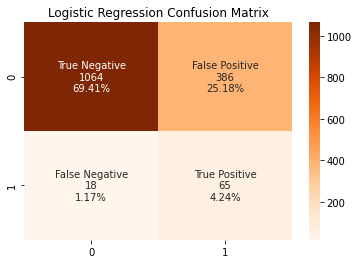

In [ ]:
# Log Model results

print('Logistic Regression Model Classification Report')
print(classification_report(y_test, y_pred_lr))
print('\n')
print('Logistic Regression Model ROC AUC:')
print(roc_auc_score(y_test, y_pred_lr))
print('\n')

lr_cf_matrix = confusion_matrix(y_test, y_pred_lr)
print(lr_cf_matrix)
print('\n')

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                lr_cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     lr_cf_matrix.flatten()/np.sum(lr_cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(lr_cf_matrix, annot=labels, fmt="", cmap='Oranges')

plt.title("Logistic Regression Confusion Matrix")

The logistic regression model for the new sample reports an AUC greatter than the Random Forrest and Booster Tree models. At .7712 it shows greatter correlation than any prior model. 

In [ ]:
# Finding Optimal Neighbors for KNN Model

max_K = 100
cv_scores = [ ]

for K in range(1,max_K+1):
  knn = KNeighborsClassifier(n_neighbors = K)
  scores = cross_val_score(knn, X_train_scaled_sm, y_train_sm.ravel(),cv = 5, scoring = "roc_auc")
  cv_scores.append(scores.mean())

neighbors= []
i = 1
for i in range (i, 100+1):
  neighbors.append(i)
  i = i+1

neighbor_amount = pd.DataFrame(neighbors, columns= ['neighbors'])
neighbor_amount['roc_auc']= pd.DataFrame(cv_scores)
neighbor_amount.sort_values(by= 'roc_auc', ascending= False)

,neighbors,roc_auc
4,5,0.960817
5,6,0.960221
3,4,0.959764
6,7,0.958680
2,3,0.956661
...,...,...
95,96,0.846332
96,97,0.845775
97,98,0.845262
98,99,0.845061


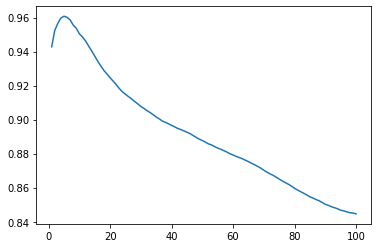

In [ ]:
# Visual representation of cv scores

sns.lineplot(x=range(1,max_K+1), y=cv_scores)

In [ ]:
# Optimal KNN Model

knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model.fit(X_train_scaled_sm, y_train_sm)

y_pred_knn = knn_model.predict(X_test_scaled)

KNN Model Classification Report
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1450
           1       0.08      0.23      0.12        83

    accuracy                           0.82      1533
   macro avg       0.52      0.54      0.51      1533
weighted avg       0.90      0.82      0.86      1533



KNN Model ROC AUC
0.541699210635646


[[1239  211]
 [  64   19]]




Text(0.5, 1.0, 'KNN Confusion Matrix')

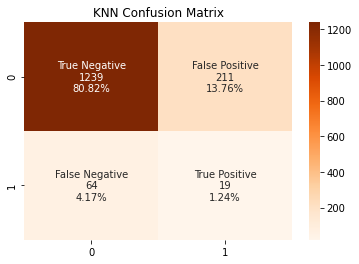

In [ ]:
# KNN Model results

print('KNN Model Classification Report')
print(classification_report(y_test, y_pred_knn))
print('\n')
print('KNN Model ROC AUC')
print(roc_auc_score(y_test, y_pred_knn))
print('\n')

knn_cf_matrix = confusion_matrix(y_test, y_pred_knn)
print(knn_cf_matrix)
print('\n')

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                knn_cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     knn_cf_matrix.flatten()/np.sum(knn_cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(knn_cf_matrix, annot=labels, fmt="", cmap='Oranges')

plt.title("KNN Confusion Matrix")

Lastly the AUC OF THE KNN Model reported a .52. This is parity when compared to the boosted tree model.

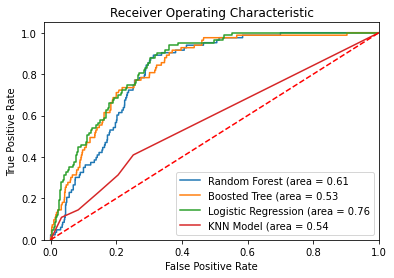

In [ ]:
# AUC Curve with all models represented

rf_roc_auc = roc_auc_score(y_test, rf_model.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

bt_roc_auc = roc_auc_score(y_test, bt_model.predict(X_test))
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test, bt_model.predict_proba(X_test)[:,1])

lr_roc_auc = roc_auc_score(y_test, lr_model.predict(X_test_scaled))
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_model.predict_proba(X_test_scaled)[:,1])

knn_roc_auc = roc_auc_score(y_test, knn_model.predict(X_test_scaled))
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_model.predict_proba(X_test_scaled)[:,1])

plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted Tree (area = %0.2f' % bt_roc_auc)
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (area = %0.2f' % lr_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN Model (area = %0.2f' % knn_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
def get_performance(y_actual, y_pred):
    cm = confusion_matrix(y_actual, y_pred)
    Total= sum(sum(cm))
    accuracy= (cm[0,0]+cm[1,1])/Total
    specificity= cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity= cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [ ]:
accuracy_rf, sensitivity_rf, specificity_rf = get_performance(y_test, y_pred_rf)

accuracy_bt, sensitivity_bt, specificity_bt = get_performance(y_test, y_pred_bt)

accuracy_lr, sensitivity_lr, specificity_lr = get_performance(y_test, y_pred_lr)

accuracy_knn, sensitivity_knn, specificity_knn = get_performance(y_test, y_pred_knn)

In [ ]:
perf= pd.DataFrame([accuracy_rf, accuracy_bt, accuracy_lr, accuracy_knn],
                   columns= ['Accuracy'],
                   index= ['Random Forest', 'Boosted Tree', 'Logistic Regression', 'KNN'])

perf['Sensitivity']= np.asarray([sensitivity_rf, sensitivity_bt, sensitivity_lr, sensitivity_knn])

perf['Specificity']= np.asarray([specificity_rf, specificity_bt, specificity_lr, specificity_knn])

perf

,Accuracy,Sensitivity,Specificity
Random Forest,0.879974,0.313253,0.912414
Boosted Tree,0.941944,0.072289,0.991724
Logistic Regression,0.736464,0.783133,0.733793
KNN,0.820613,0.228916,0.854483


In [ ]:
# Optimizing model performance (Logistic Regression)

logit_model = sm.Logit(y_train_sm, X_train_scaled_sm)
log_model = logit_model.fit()
print(log_model.summary())

         Current function value: 0.523818
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 6822
Model:                          Logit   Df Residuals:                     6807
Method:                           MLE   Df Model:                           14
Date:                Thu, 22 Apr 2021   Pseudo R-squ.:                  0.2443
Time:                        00:38:55   Log-Likelihood:                -3573.5
converged:                      False   LL-Null:                       -4728.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4967      0.062     -7.975      0.000      -0.619      -0.375
x2             4.5638      0.165     27.626      0.000       4.24

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


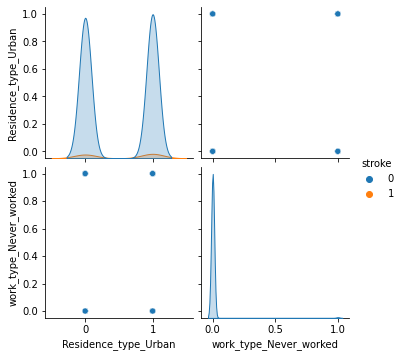

In [ ]:
sns.pairplot(df_clean[['Residence_type_Urban', 'work_type_Never_worked', 'stroke']], hue='stroke')